analyzing movie reviews

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import linregress
from scipy.stats import pearsonr

%matplotlib inline

# import data
movies = pd.read_csv("fandango_score_comparison.csv")

# print out first five lines of the dataframe
print(movies.head())

                             FILM  RottenTomatoes  RottenTomatoes_User  \
0  Avengers: Age of Ultron (2015)              74                   86   
1               Cinderella (2015)              85                   80   
2                  Ant-Man (2015)              80                   90   
3          Do You Believe? (2015)              18                   84   
4   Hot Tub Time Machine 2 (2015)              14                   28   

   Metacritic  Metacritic_User  IMDB  Fandango_Stars  Fandango_Ratingvalue  \
0          66              7.1   7.8             5.0                   4.5   
1          67              7.5   7.1             5.0                   4.5   
2          64              8.1   7.8             5.0                   4.5   
3          22              4.7   5.4             5.0                   4.5   
4          29              3.4   5.1             3.5                   3.0   

   RT_norm  RT_user_norm         ...           IMDB_norm  RT_norm_round  \
0     3.70 

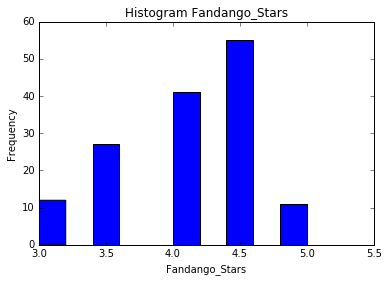

In [2]:
# create a histogram of the Fandango ratings
fig1 = plt.figure()
ax1 = fig1.add_subplot(1, 1, 1)
ax1.hist(movies["Fandango_Stars"])
ax1.set(xlabel="Fandango_Stars", ylabel="Frequency", title="Histogram Fandango_Stars")

 (0, 5),

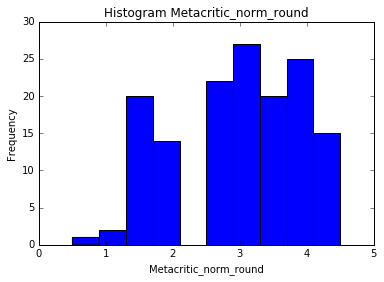

In [3]:
# plot a histogram of the normalized Metacritic scores
fig2 = plt.figure()
ax2 = fig2.add_subplot(1, 1, 1)
ax2.hist(movies["Metacritic_norm_round"])
ax2.set(xlabel="Metacritic_norm_round", ylabel="Frequency", 
        title="Histogram Metacritic_norm_round", xlim=(0, 5))

In [4]:
# calculate the mean, median and std for both rating columns and compare the results
fan_star_mean = movies["Fandango_Stars"].mean()
fan_star_med = movies["Fandango_Stars"].median()
fan_star_std = np.std(movies["Fandango_Stars"])

met_norm_round_mean = movies["Metacritic_norm_round"].mean()
met_norm_round_med = movies["Metacritic_norm_round"].median()
met_norm_round_std = np.std(movies["Metacritic_norm_round"])

print("\t\t\t Mean\t\t\t Median\t std")
print("Fandango_Stars \t\t {0} \t {1} \t {2}".format(fan_star_mean, fan_star_med, 
                                                   fan_star_std))
print("Metacritic_norm_round \t {0} \t {1} \t {2}".format(met_norm_round_mean, 
                                                          met_norm_round_med, 
                                                          met_norm_round_std))

			 Mean			 Median	 std
Fandango_Stars 		 4.089041095890411 	 4.0 	 0.5385321612699531
Metacritic_norm_round 	 2.9726027397260273 	 3.0 	 0.9875610297038631


[(0, 5),
 (0, 5),

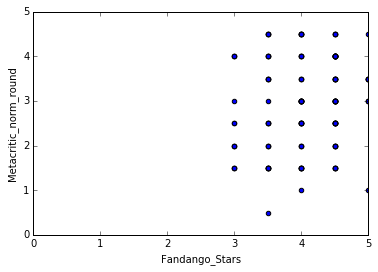

In [5]:
# scatter plot to compare the two rating columns
fig3 = plt.figure()
ax3 = fig3.add_subplot(1, 1, 1)
ax3.scatter(movies["Fandango_Stars"], movies["Metacritic_norm_round"])
ax3.set(xlabel="Fandango_Stars", ylabel="Metacritic_norm_round", xlim=(0, 5), ylim=(0, 5))

In [6]:
# find movies that have very different scores on the two critics sites
movies["fm_diff"] = np.abs(movies["Fandango_Stars"] - movies["Metacritic_norm_round"])
print(movies.sort_values("fm_diff", ascending=False).head())

                        FILM  RottenTomatoes  RottenTomatoes_User  Metacritic  \
3     Do You Believe? (2015)              18                   84          22   
85         Little Boy (2015)              20                   81          30   
47              Annie (2014)              27                   61          33   
19             Pixels (2015)              17                   54          27   
134  The Longest Ride (2015)              31                   73          33   

     Metacritic_User  IMDB  Fandango_Stars  Fandango_Ratingvalue  RT_norm  \
3                4.7   5.4             5.0                   4.5     0.90   
85               5.9   7.4             4.5                   4.3     1.00   
47               4.8   5.2             4.5                   4.2     1.35   
19               5.3   5.6             4.5                   4.1     0.85   
134              4.8   7.2             4.5                   4.5     1.55   

     RT_user_norm   ...     RT_norm_round  RT_user

In [7]:
# find the r-value describing the correlation between the Fandango stars and the normalized
# Metacritic scores
r_value, p_value = pearsonr(movies["Fandango_Stars"], movies["Metacritic_norm_round"])
print("r-value: {0}, p-value: {1}".format(r_value, p_value))

r-value: 0.17844919073895918, p-value: 0.031161516228523815


discuss low r-value... indicates that the ratings on Fandango and Metacritic are fundamentally different, scores seem inflated on Fandango

[(0, 5),
 (0, 5),

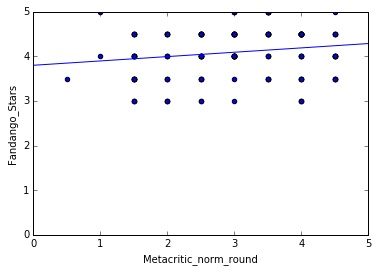

In [8]:
# create a linear regression line using the normalized Metacritic scores as x-values and
# the Fandango stars as y-values
slope, intercept, rvalue, pvalue, stderr = linregress(movies["Metacritic_norm_round"], movies["Fandango_Stars"])

# plot the regression line
fig4 = plt.figure()
ax4 = fig4.add_subplot(1, 1, 1)

x = np.arange(0, 6)
y = slope * x + intercept
ax4.scatter(movies["Metacritic_norm_round"], movies["Fandango_Stars"])
ax4.plot(x, y)
ax4.set(xlabel="Metacritic_norm_round", ylabel="Fandango_Stars", xlim=(0, 5), ylim=(0, 5))

In [9]:
# predict the Fandango score a movie with a Metacritic rating of 3.0 would get using the
# regression line
fandango_predicted1 = 3.0 * slope + intercept
print("Fandango_Stars predicted for Metacritic_norm_round of 3.0: {0}"
      .format(fandango_predicted1))

fandango_predicted2 = 4.0 * slope + intercept
print("Fandango_Stars predicted for Metacritic_norm_round of 4.0: {0}"
      .format(fandango_predicted2))

Fandango_Stars predicted for Metacritic_norm_round of 3.0: 4.091707152821204
Fandango_Stars predicted for Metacritic_norm_round of 4.0: 4.189018230795132


potential next steps....

- compare IMDB and RottenTomatoes scores
- see how they compare to the Fandango ratings
- compare user and critic scores
